In [1]:
import numpy as np

# Listing the the number of variables and creating the associated indeces:
num_strains = 8
indeces_strains = np.array(range(1,9))
num_promoters = 10
indeces_promoters = np.array(range(num_strains+1, num_strains+num_promoters+1))
num_secretion_signals = 4
indeces_secretion = np.array(range(num_strains+num_promoters+1, num_strains+num_promoters+num_secretion_signals+1))
num_genes = 4
indeces_genes = np.array(range(num_strains+num_promoters+num_secretion_signals+1, num_strains+num_promoters+num_secretion_signals+num_genes+1))


num_combinations = num_strains*num_genes*num_promoters*num_secretion_signals

print(f'Size combinatorial library: {num_combinations}')

Size combinatorial library: 1280


In [2]:
print(indeces_strains)
print(indeces_promoters)
print(indeces_secretion)
print(indeces_genes)

[1 2 3 4 5 6 7 8]
[ 9 10 11 12 13 14 15 16 17 18]
[19 20 21 22]
[23 24 25 26]


In [3]:
# Iteratively initialize the combinatory library 

def init_comb_library(size):
    comb_library = [np.zeros(0) for i in range(size)]
    i = 0
    for idx1 in indeces_strains:
        for idx2 in indeces_promoters:
            for idx3 in indeces_secretion:
                for idx4 in indeces_genes:
                    comb_library[i] = [idx1, idx2, idx3, idx4]
                    i += 1
    return comb_library

In [75]:
# Initializing the set of constructs
import random

np.random.seed(2021) # For an unbalanced sub-set, set seed to 42
percentage_comb_library = 7

num_constructs = int(np.rint(num_combinations/(100/percentage_comb_library)))

# Initializing the entire combinational library
comb_library = init_comb_library(num_combinations)

construct_indeces = np.random.choice(range(num_combinations), num_constructs, replace=False)
constructs = [comb_library[i] for i in construct_indeces]
constructs = np.array(constructs)
print(f'{num_constructs}')

print(f'First five constructs:')
print(constructs[:5])

90
First five constructs:
[[ 6 15 19 26]
 [ 3 12 19 26]
 [ 6 15 19 23]
 [ 7 15 20 23]
 [ 3 14 21 23]]


In [149]:
print(np.unique(constructs[:,0]))

[1 2 3 4 5 6 7 8]


Text(0.5, 1.0, 'Distribution of genes')

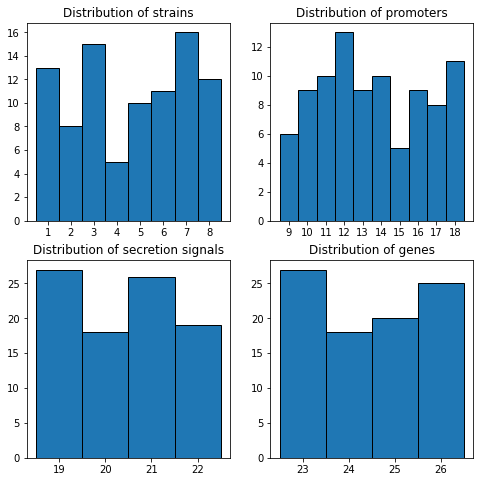

In [76]:
import matplotlib.pyplot as plt

# Plotting the occurances of each part withing the selected constructs

fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0][0].hist(constructs[:,0], align='mid', bins=np.append(indeces_strains,9)-0.5, edgecolor = 'black')
axs[0][0].set_xticks(indeces_strains)
axs[0][0].set_title('Distribution of strains')
axs[0][1].hist(constructs[:,1], align='mid', bins=np.append(indeces_promoters,19)-0.5, edgecolor = 'black')
axs[0][1].set_xticks(indeces_promoters)
axs[0][1].set_title('Distribution of promoters')
axs[1][0].hist(constructs[:,2], align='mid', bins=np.append(indeces_secretion,23)-0.5, edgecolor = 'black')
axs[1][0].set_title('Distribution of secretion signals')
axs[1][1].hist(constructs[:,3], align='mid', bins=np.append(indeces_genes,27)-0.5, edgecolor = 'black')
axs[1][1].set_title('Distribution of genes')

In [79]:
# Tranforming the 2d array into a one-hot-encoded panda.DataFrame

import pandas as pd

df = pd.DataFrame(constructs, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
print(df.head())
strains_art_oneh = pd.get_dummies(data=df, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
strains_art_oneh.head()

   str_idx  pro_idx  sec_idx  gen_idx
0        6       15       19       26
1        3       12       19       26
2        6       15       19       23
3        7       15       20       23
4        3       14       21       23


,str_idx_1,str_idx_2,str_idx_3,str_idx_4,str_idx_5,str_idx_6,str_idx_7,str_idx_8,pro_idx_9,pro_idx_10,...,pro_idx_17,pro_idx_18,sec_idx_19,sec_idx_20,sec_idx_21,sec_idx_22,gen_idx_23,gen_idx_24,gen_idx_25,gen_idx_26
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [78]:
## If handling different measurement types, first normalise the data. Should not be necessary if everything is one-hot encoded

# from sklearn.preprocessing import StandardScaler

# strains_art_oneh = StandardScaler().fit_transform(strains_art_oneh) # normalizing the features
# print(strains_art_oneh.shape)

# print(np.mean(strains_art_oneh),np.std(strains_art_oneh))
# print(strains_art_oneh[:5])

(90, 26)
-1.3474501666390789e-17 1.0
[[-0.4108907  -0.31234752 -0.4472136  -0.24253563 -0.35355339  2.67989145
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339 -0.4108907
  -0.33333333 -0.35355339  4.12310563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613 -0.65465367 -0.5
  -0.53452248  1.61245155]
 [-0.4108907  -0.31234752  2.23606798 -0.24253563 -0.35355339 -0.37314944
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339  2.43373723
  -0.33333333 -0.35355339 -0.24253563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613 -0.65465367 -0.5
  -0.53452248  1.61245155]
 [-0.4108907  -0.31234752 -0.4472136  -0.24253563 -0.35355339  2.67989145
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339 -0.4108907
  -0.33333333 -0.35355339  4.12310563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613  1.52752523 -0.5
  -0.53452248 -0.62017367]
 [-0.4108907  -0.

In [84]:
from sklearn.decomposition import PCA

# Starting the Principal Componant Analysis in order to determine wether each part adds sufficient variablity 
# to the set of selceted constructs

number_of_PCA_components = 20 # Select the number of principal components you with to analyse. Set to 8+10+4+4=26 to include all variability

pca_constructs = PCA(n_components=number_of_PCA_components)
principalComponents_constructs = pca_constructs.fit_transform(strains_art_oneh) 

print(f"sum of all components: {np.sum(pca_constructs.explained_variance_ratio_)}") # A measure of how much variability is included in the PCA. If 1.0, all variability is included
print(pca_constructs.explained_variance_ratio_) # Shows how much each PC contributes to the total amount of variability

eigenvalues = pca_constructs.components_ # Extracts the influence of each variable on each principle component

contributions_pca = (abs(eigenvalues)*100) / abs(eigenvalues).sum(axis=1, keepdims=True) # Expresses the contribution of each variable to a PC in percentages

#print(contributions_pca)
contributions_pca = pd.DataFrame(contributions_pca, columns = strains_art_oneh.columns)
print(np.sum(contributions_pca.iloc[0])) # Shows that the sum of the influence of each variable on the first PC is equal to 100% 
print(contributions_pca.iloc[0]) # Shows the relative influence of each variable on the first PC

sum of all components: 0.9758581824233616
[0.1037928  0.09949963 0.08417862 0.07718789 0.0748287  0.06700994
 0.0558837  0.04889642 0.04654028 0.04156714 0.03734968 0.03510922
 0.03229142 0.03102803 0.02872815 0.02749231 0.02410998 0.02244776
 0.02058282 0.01733368]
100.0
str_idx_1      1.525743
str_idx_2      1.408274
str_idx_3      1.034718
str_idx_4      1.651936
str_idx_5      2.057330
str_idx_6      0.696883
str_idx_7      5.012974
str_idx_8      2.506123
pro_idx_9      3.003732
pro_idx_10     1.532596
pro_idx_11     0.231354
pro_idx_12     0.799251
pro_idx_13     1.829300
pro_idx_14     1.366901
pro_idx_15     2.493624
pro_idx_16     5.034838
pro_idx_17     0.055802
pro_idx_18     2.575147
sec_idx_19    18.370985
sec_idx_20     5.496948
sec_idx_21     6.940385
sec_idx_22     5.933652
gen_idx_23     2.181381
gen_idx_24     6.195256
gen_idx_25     5.844115
gen_idx_26    14.220751
Name: 0, dtype: float64


In [87]:
# Obtain the percentage of variance originating from each variable by calculating the dot product between: 
# - the explained variance ratio of each PC 
# - how much each variable contributed to that PC

perc_var_per_parameter = np.dot(pca_constructs.explained_variance_ratio_, contributions_pca)


print(perc_var_per_parameter) # How much each variable contributed to the total variance in percentages
       
print(np.sum(perc_var_per_parameter)) # The sum of all percentages. Should be 100% if number_of_PCA_components=26

[3.92180381 2.54285003 4.15209978 1.86348804 2.76740829 3.50370992
 3.96555435 4.23574369 2.54619103 3.41900477 3.38264569 3.96927884
 3.37387573 3.40919386 1.83409815 3.4178744  2.94048979 3.2562231
 4.76426548 5.02562683 4.78227916 4.79110836 4.70125402 4.70772036
 5.23700335 5.07502744]
97.58581824233616


8 7


Text(0.5, 1.0, 'Distribution of genes')

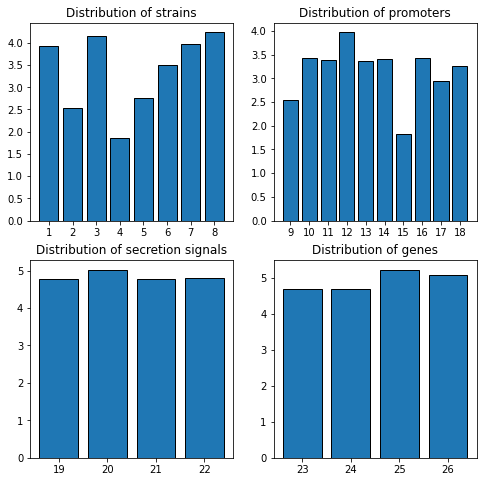

In [88]:
# Creating a bar plot of contribution of each variable to the total variance in perentages
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0][0].bar(indeces_strains, perc_var_per_parameter[0:8], edgecolor = 'black')
axs[0][0].set_xticks(indeces_strains)
axs[0][0].set_title('Distribution of strains')
axs[0][1].bar(indeces_promoters, perc_var_per_parameter[8:18], edgecolor = 'black')
axs[0][1].set_xticks(indeces_promoters)
axs[0][1].set_title('Distribution of promoters')
axs[1][0].bar(indeces_secretion, perc_var_per_parameter[18:22], edgecolor = 'black')
axs[1][0].set_title('Distribution of secretion signals')
axs[1][1].bar(indeces_genes, perc_var_per_parameter[22:26], edgecolor = 'black')
axs[1][1].set_title('Distribution of genes')